In [128]:
import os
import pandas
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from glob import glob



In [3]:
# matfile
matfile = '/Users/jakevogel/Science/tau/ESM_tau/results/prelim/ESM_tau_propagation_19-Dec-2017.mat'
mat = loadmat(matfile)

In [16]:
# reference dataframe
refsht = '/Users/jakevogel/Science/tau/ADNI_MASTER.csv'
refdf = pandas.read_csv(refsht)


In [25]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_snorm_*'))
sids = [x.split('/')[-1].split('_')[2] for x in scans]
sids[0]

'002-S-4229'

In [21]:
! ls -lrth /Users/jakevogel/Science/tau/

total 5013120
-rw-rw-r--@  1 jakevogel  staff    14M Aug 20  2016 MNI152_T1_1mm_brain.nii
-rw-rw-r--@  1 jakevogel  staff   2.1M Sep 23  2016 test_4815.nii.gz
-rw-r--r--@  1 jakevogel  staff   120K Dec 14  2016 nii_dkt_atlas_1p5mm.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4262_18F-AV1451_2016-02-25_P4_I651320.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4521_18F-AV1451_2016-04-05_P4_I730844.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4654_18F-AV1451_2016-04-21_P4_I699996.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_002-S-4799_18F-AV1451_2016-07-27_P4_I767572.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-2394_18F-AV1451_2016-07-19_P4_I762869.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-4620_18F-AV1451_2016-07-15_P4_I761155.nii.gz
-rw-rw-r--@  1 jakevogel  staff    25M Feb  2  2017 nan_snorm_007-S-4637_18F-AV1451_

In [24]:
# reference dataframe
sht = '/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv'
df = pandas.read_csv(sht)
df.head()

,Unnamed: 0,subs,subs.1,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.2,RID,SITE,COLPROT,ORIGPROT,...,brain_partition_consensus_ind_lund_sci5_scf5_5,lund_ET_3_1,lund_ET_3_2,lund_ET_3_3,lund_ET_6_1,lund_ET_6_2,lund_ET_6_3,lund_ET_6_4,lund_ET_6_5,lund_ET_6_6
0,0,002-S-4229,002-S-4229,002-S-4229,002-S-4229,002-S-4229,4229.0,2.0,ADNI2,ADNI2,...,1.001502,1.348725,1.067139,1.103361,1.348725,1.115261,1.081559,1.238158,1.103050,1.051729
1,1,002-S-4262,002-S-4262,002-S-4262,002-S-4262,002-S-4262,4262.0,2.0,ADNI2,ADNI2,...,1.145301,1.507033,1.165363,1.106672,1.507033,1.120392,1.141073,1.190362,1.182348,1.090506
2,2,002-S-4521,002-S-4521,002-S-4521,002-S-4521,002-S-4521,4521.0,2.0,ADNI2,ADNI2,...,1.250661,1.542644,1.144523,1.285093,1.542644,1.314419,1.292172,1.414967,1.184433,1.141633
3,3,002-S-4654,002-S-4654,002-S-4654,002-S-4654,002-S-4654,4654.0,2.0,ADNI2,ADNI2,...,1.186976,1.198241,1.018570,0.983168,1.198241,0.974095,1.043101,1.081553,1.044473,0.990339
4,4,002-S-4799,002-S-4799,002-S-4799,002-S-4799,002-S-4799,4799.0,2.0,ADNI2,ADNI2,...,1.095576,1.542920,1.317958,1.241442,1.542920,1.250776,1.319128,1.337707,1.332920,1.262309


In [28]:
all([x in df.subs.tolist() for x in sids])

True

In [33]:
mat.keys()

dict_keys(['Long_Matrix', 'Final_solutions', 'DELTAS_est', 'Conn_Matrix', 'time_range', 'SIGMAS0', 'AGEs', 'BETAS_est', '__globals__', 'Nparameters', 'Nmodels', 'ref_pattern', 'Nsubjects', 'DELTAS0', 'h_integration', '__version__', '__header__', 'Final_parameters', 'Nnodes', 'models', 'num_repetitions', 'MUS0', 'BETAS0', 'Final_CORRs', 'Final_RMSEs', 'ONSETS_est', 'Final_times'])

In [89]:
mat['models'][0,0][0][0]

array([ 3, 58, 19, 80,  4, 43], dtype=uint8)

In [70]:
labs = pandas.read_csv('/Users/jakevogel/git/pycourse_vuMC/stuff/dst_labels.csv', header=None)
labs.columns = ['integer_label', 'label']
labs.head()

,integer_label,label
0,1,Caudal anterior cingulate
1,2,Caudal middle frontal
2,3,Cuneus
3,4,entorinal
4,5,fusiform


In [107]:
def get_results(mat, sids, save=True, labels = None):

    res = pandas.DataFrame(index = sids)
    for i in range(len(mat['ref_pattern'][0])):
        # Model fits
        sid = sids[i]
        r,p = stats.pearsonr(mat['ref_pattern'][:,i], mat['Final_solutions'][:,i])
        res.loc[sid,'model_r'] = r
        res.loc[sid,'model_r2'] = r**2
    res.loc[:, 'model_RMSE'] = mat['Final_RMSEs'].flatten()
    res.loc[:, 'model_eval'] = mat['Final_CORRs'].flatten()

    if save:
        # params
        res.loc[:, 'beta'] = mat['Final_parameters'][0,:].flatten()
        res.loc[:, 'delta'] = mat['Final_parameters'][1,:].flatten()
        res.loc[:, 'sigma'] = mat['Final_parameters'][2,:].flatten()

        # other
        res.loc[:, 'ref_age'] = mat['AGEs'].flatten()
        res.loc[:, 'times'] = mat['Final_times'].flatten()
        res.loc[:, 'Onset_age'] = mat['ONSETS_est'].flatten()
    
    print('average r2 = ', res.model_r2.mean())
    print('average RMSE =', res.model_RMSE.mean())
    print('average eval =', res.model_eval.mean())
    
    if type(labels) != type(None):
        print('model identfied the following epicenters')
        for l in mat['models'][0,0][0][0]:
            print(labels.iloc[l-1]['label'])
    
    if save:
        return res

In [108]:
res = get_results(mat, sids, labels=labs)

average r2 =  0.06610057278746423
average RMSE = 0.15058200061321259
average eval = 0.8022727966308594
model identfied the following epicenters
 Cuneus
 Pericalcarine
 Pericalcarine
 R Cerebellum
 entorinal
 entorinal


In [111]:
df.columns[18:30]

Index(['APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting'],
      dtype='object')

In [115]:
# add demos
res.loc[:,'amyloid'] = df.av45_status_wcb.values
res.loc[:,'DX'] = df.DX_final.values
res.loc[:,'Age'] = df.AGE.values
res.loc[:,'Gender'] = df.PTGENDER.values
res.loc[:,'Education'] = df.PTEDUCAT.values
res.loc[:,'ApoE4'] = df.APOE4.values

In [121]:
res.Age.mean()

71.34444444444445

In [122]:
res.ref_age.mean()

76.11271611111111

In [123]:
refdf.index = [x.replace('_','-') for x in refdf.PTID]

AttributeError: 'float' object has no attribute 'replace'

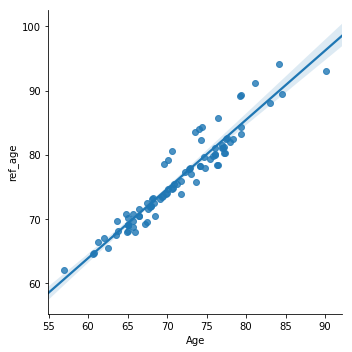

In [163]:
plt.close()
sns.lmplot('Age','ref_age',data=res)
plt.show()

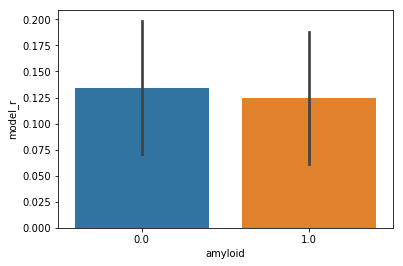

In [170]:
plt.close()
sns.barplot('amyloid','model_r',data=res)
plt.show()

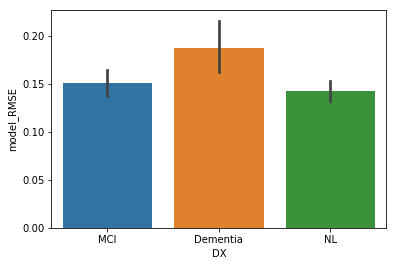

In [173]:
plt.close()
sns.barplot('DX','model_RMSE',data=res)
plt.show()

In [177]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.amyloid==0][col],
                         res[res.amyloid==1][col])
    if p<0.05:
        print(col,t,p)

model_RMSE -2.58569933365 0.0114222457977
ref_age -4.13858031733 8.1909768325e-05
Onset_age -3.00233437844 0.00351738685399


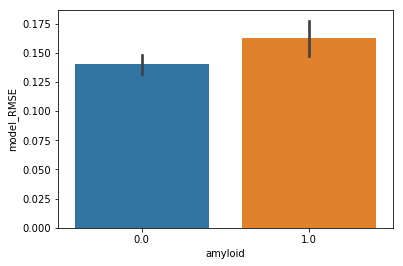

In [180]:
plt.close()
sns.barplot('amyloid','model_RMSE',data=res)
plt.show()

In [181]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(res[res.DX=='NL'][col],
                         res[res.DX=='MCI'][col],
                        res[res.DX=='Dementia'][col])
    if p<0.05:
        print(col,f,p)

model_r 4.27677012298 0.0169181340359
model_r2 3.69858855264 0.028732318865
model_RMSE 5.59451256848 0.00518023238748
beta 4.16843964976 0.018673982686
ref_age 3.79984905001 0.0261747984098


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


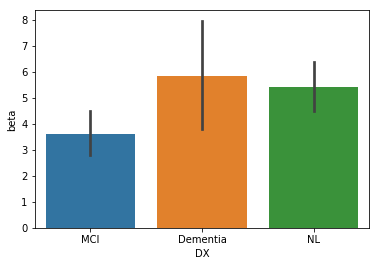

In [184]:
plt.close()
sns.barplot('DX','beta',data=res)
plt.show()

In [201]:
res.loc[:,'DX_AB'] = [res.loc[x,'DX']+'+' if res.loc[x,'amyloid']==1 else res.loc[x,'DX']+'-' for x in res.index]

In [204]:
nres.loc[:,'DX_AB'] = [nres.loc[x,'DX']+'+' if nres.loc[x,'amyloid']==1 else nres.loc[x,'DX']+'-' for x in nres.index]

In [206]:
for col in res.columns[:10]:
    f,p = stats.f_oneway(nres[nres.DX_AB=='NL-'][col],
                         nres[nres.DX_AB=='NL+'][col],
                         nres[nres.DX_AB=='MCI-'][col],
                         nres[nres.DX_AB=='MCI+'][col],
                        nres[nres.DX_AB=='Dementia+'][col])
    if p<0.1:
        print(col,f,p)

model_r 2.19615493765 0.0765569294888
model_r2 2.42033001287 0.0548957989757
model_RMSE 3.65482775443 0.0086357242776
beta 2.09045920597 0.0894708198767
ref_age 5.35636636526 0.000698340785965
Onset_age 2.2534646194 0.0703329530943


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:2968: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


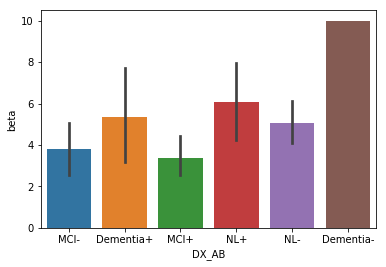

In [210]:
plt.close()
sns.barplot('DX_AB','beta',data=res)
plt.show()

In [211]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.ApoE4==0][col],
                         res[res.ApoE4==1][col])
    if p<0.05:
        print(col,t,p)

In [218]:
for col in res.columns[:10]:
    t,p = stats.ttest_ind(res[res.Gender==0][col],
                         res[res.Gender==1][col])
    if p<0.05:
        print(col,t,p)

In [221]:
for col in res.columns[:10]:
    r,p = stats.pearsonr(res[col], res['Education'])
    if p<0.05:
        print(col,r,p)

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
